In [2]:
import numpy as np
import pandas as pd
print("fhdg")

fhdg


In [3]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
# TO CHECK ANY REDUNDANCY IN DATA
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [5]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [6]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [7]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

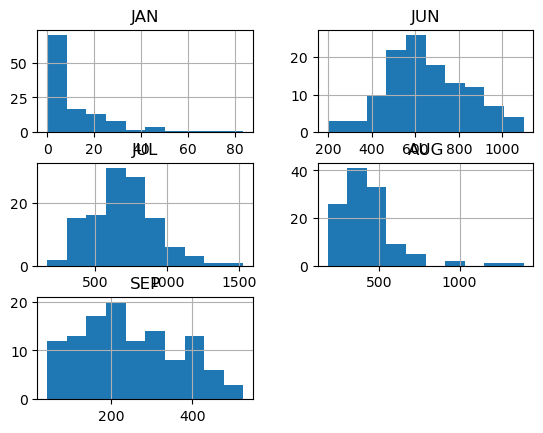

In [8]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JAN','JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [9]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

# Uniformity of Feature Influence:

# Ensures all features contribute equally to the model.
# Prevents features with larger scales from dominating the learning process.

# Improved Convergence in Optimization:

# Speeds up convergence in gradient descent by normalizing feature scales.
# Helps algorithms like linear regression, logistic regression, and neural networks converge more efficiently.

# Enhanced Model Performance:

# Ensures regularization penalties apply uniformly across features.
# Leads to more optimal models by preventing certain features from being unfairly penalized.

# Better Interpretability:

# Makes it easier to interpret the influence of each feature in models like linear regression.
# Normalizes the magnitude of coefficients for clearer insights.


array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [17]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train.head(20)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
111,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4
16,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6
25,1926,28.6,5.8,23.1,55.8,222.6,563.9,885.2,536.0,322.7,216.7,88.8,16.2
59,1960,9.4,8.4,44.4,206.6,540.0,480.3,750.9,336.8,371.2,255.9,358.0,23.7
99,2000,11.7,57.8,21.5,96.3,124.5,633.8,343.2,566.5,195.8,214.2,78.1,69.1
27,1928,12.7,65.9,51.3,121.1,81.9,590.7,420.6,553.2,75.9,321.5,155.2,52.7
65,1966,3.0,6.9,67.7,167.4,95.2,496.2,601.9,202.1,293.2,392.3,245.4,50.5
24,1925,4.1,16.5,76.9,93.4,258.2,688.8,593.5,554.1,158.8,295.4,223.7,98.8
35,1936,1.2,16.5,116.0,34.0,466.5,620.8,672.1,367.9,286.7,231.7,211.1,18.6
56,1957,1.2,16.0,25.7,70.2,381.2,872.0,835.3,358.8,41.3,280.1,192.5,28.9


In [21]:
y_train.head(20)

111    0
16     0
25     1
59     1
99     0
27     0
65     0
24     1
35     1
56     1
58     1
48     1
68     0
89     0
61     1
80     1
17     0
0      1
31     1
8      1
Name: FLOODS, dtype: int64

The K-Nearest Neighbors (KNN) classifier is a simple, yet effective, machine learning algorithm used for classification tasks. The basic idea of KNN is to classify a new data point based on the majority class of its 'k' nearest neighbors in the feature space.


How KNN Works
Choose the number of neighbors (k):
 The first step in the KNN algorithm is to choose the number of neighbors, k, that will be considered when making the classification decision.

Compute distances:
 For a given data point that needs to be classified, the algorithm computes the distance between this point and all other points in the training dataset. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

Identify the nearest neighbors: 
Once the distances are computed, the algorithm identifies the k data points in the training set that are closest to the data point to be classified.

Majority voting: 
The KNN algorithm then assigns the most common class (i.e., majority vote) among the k nearest neighbors to the data point being classified.

Prediction:
 The algorithm predicts the class label for the new data point based on the majority class among its neighbors.

In [22]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [23]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1]


In [24]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
109    1
26     1
13     0
53     1
81     0
9      0
71     0
77     1
102    0
103    0
54     1
117    1
55     0
50     0
36     0
37     0
88     0
10     0
93     1
92     0
2      1
34     0
57     1
3      1
Name: FLOODS, dtype: int64


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# checkind accuracy
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [27]:
knn_accuracy.mean()

0.6666666666666666

Logistic regression

Logistic regression is a foundational classification technique that balances simplicity and effectiveness. It is best suited for problems where the relationship between the independent variables and the outcome is approximately linear and the outcome is binary. With proper

In [28]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [30]:
lr_accuracy.mean()

0.6666666666666666

In [31]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1]


In [32]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1]


In [33]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 75.000000
recall score: 90.000000
roc score: 77.142857


Decision tree classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.65625   , 0.51612903, 0.67741935])

In [35]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1]


In [36]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1]


In [37]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:62.500000
recall score:70.000000
roc score:63.571429


Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [40]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [41]:

rmf_clf_acc



array([0.875     , 0.77419355, 0.80645161])

In [42]:
y_pred = rmf_clf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:79.166667
recall score:100.000000
roc score:82.142857


 Enseble Learning

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [45]:
voting_clf = voting.fit(x_train, y_train)

In [46]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.875
RandomForestClassifier 0.75
KNeighborsClassifier 0.8333333333333334
VotingClassifier 0.875


In [47]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.833333
1   LR  0.875000
2   DT  0.750000
3   RF  0.833333
4   EL  0.875000


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


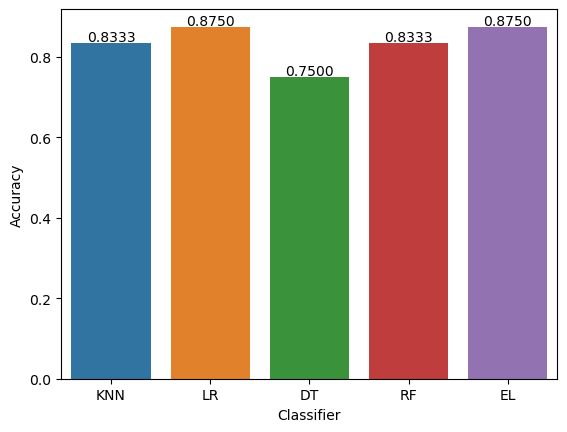

In [48]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()